In [ ]:
# Building a neural network for Iris dataset

In [35]:
import torch
import pandas as pd
from torchvision import transforms, utils
from torch.autograd import Variable
import torch.utils.data as data_utils
import numpy as np
import matplotlib.pyplot as graph

#Creating a model for Iris dataset training and validation
class IrisNet(torch.nn.Module):
    def __init__(self,input_layer,hidden_1_size,hidden_2_size,output_layer):
        super(IrisNet,self).__init__()
        self.first_layer=torch.nn.Linear(input_layer,hidden_1_size)
        self.first_layer_activation=torch.nn.ReLU()
        self.second_layer=torch.nn.Linear(hidden_1_size,hidden_2_size)
        self.second_layer_activation=torch.nn.ReLU()
        self.third_layer=torch.nn.Linear(hidden_2_size,output_layer)
        self.third_layer_activation=torch.nn.Sigmoid()

    def forward(self,x):
        output_1=self.first_layer(x)
        output_1=self.first_layer_activation(output_1)
        output_2=self.second_layer(output_1)
        output_2=self.second_layer_activation(output_2)
        output_3=self.third_layer(output_2)
        return output_3

#Specifying the no of neurons in every layer
model=IrisNet(4,100,40,3)

batch_size=30
path_dataset='data\iris.csv'

iris_dataset=pd.read_csv(path_dataset,header=None)

#Use data for training

train_features_1=iris_dataset.iloc[0:40,0:4]
train_features_2=iris_dataset.iloc[50:90,0:4]
train_features_3=iris_dataset.iloc[100:140,0:4]
train_features=pd.concat([train_features_1,train_features_2,train_features_3])


train_label_1=iris_dataset.iloc[0:40,-1]
train_label_2=iris_dataset.iloc[50:90,-1]
train_label_3=iris_dataset.iloc[100:140,-1]
train_label=pd.concat([train_label_1,train_label_2,train_label_3])


train_features=torch.Tensor(train_features.values)

train_label=torch.LongTensor(train_label.values)

train_data=data_utils.TensorDataset(train_features,train_label)

train_loader=data_utils.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)

#Use data for testing

test_features_1=iris_dataset.iloc[40:50,0:4]
test_features_2=iris_dataset.iloc[90:100,0:4]
test_features_3=iris_dataset.iloc[140:150,0:4]
test_features=pd.concat([test_features_1,test_features_2,test_features_3])

test_label_1=iris_dataset.iloc[40:50,-1]
test_label_2=iris_dataset.iloc[90:100,-1]
test_label_3=iris_dataset.iloc[140:150,-1]
test_label=pd.concat([test_label_1,test_label_2,test_label_3])

test_features=torch.Tensor(test_features.values)

test_label=torch.LongTensor(test_label.values)

test_data=data_utils.TensorDataset(test_features,test_label)

test_loader=data_utils.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=True)

#Defining the loss function for the model
criterion=torch.nn.CrossEntropyLoss()

#defining the learning rate
learning_rate=0.001

#defining the optimizer 
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,nesterov=True,momentum=0.9)

no_of_epoch=5000

training_loss=[]
training_accuracy=[]
testing_loss=[]
testing_accuracy=[]
epoch_list=[]

for epoch in range(no_of_epoch):
    
    total_trained=0
    correctly_trained=0
    
    for i ,(train_features,train_labels) in enumerate(train_loader):
        train_features=Variable(train_features)
        train_labels=Variable(train_labels)
        
        model.train()
        
        optimizer.zero_grad()
        
        output=model(train_features)
        
        loss=criterion(output,train_labels)
        
        loss.backward()
        
        optimizer.step()
        
        total_trained += train_labels.size(0)
        
        _ , predicted_labels = torch.max(output.data,1)
        
        correctly_trained += (train_labels.data==predicted_labels).sum()
    
    #Priniting the Accuracy and loss values for training data
    print("Epoch:%d"%(epoch))
    print("Training...")
    print(" Accuracy:%f loss:%f"%((correctly_trained/total_trained)*100,loss))
    
    training_loss.append(loss.data)
    training_accuracy.append((correctly_trained/total_trained)*100)
    epoch_list.append(epoch)
    
    output=model(Variable(test_features))
    
    loss=criterion(output,Variable(test_label))
    
    _ , predicted_label = torch.max(output.data,1)
    
    correct_prediction=(predicted_label==test_label).sum()
    
    #Prinitng the Accuracy and loss values for testing data
    print("Testing...")
    print("Accuracy:%f loss:%f"%((correct_prediction/test_label.size(0))*100,loss))
    
    testing_loss.append(loss.data)
    testing_accuracy.append((correct_prediction/test_label.size(0))*100)






Epoch:0
Training...
 Accuracy:33.333333 loss:1.183893
Testing...
Accuracy:33.333333 loss:1.159990
Epoch:1
Training...
 Accuracy:33.333333 loss:1.126927
Testing...
Accuracy:33.333333 loss:1.099834
Epoch:2
Training...
 Accuracy:33.333333 loss:1.069405
Testing...
Accuracy:33.333333 loss:1.064283
Epoch:3
Training...
 Accuracy:55.000000 loss:1.049390
Testing...
Accuracy:66.666667 loss:1.041232
Epoch:4
Training...
 Accuracy:66.666667 loss:1.020936
Testing...
Accuracy:66.666667 loss:1.023136
Epoch:5
Training...
 Accuracy:65.833333 loss:1.072715
Testing...
Accuracy:63.333333 loss:1.006207
Epoch:6
Training...
 Accuracy:65.833333 loss:0.977484
Testing...
Accuracy:66.666667 loss:0.984448
Epoch:7
Training...
 Accuracy:66.666667 loss:0.939556
Testing...
Accuracy:66.666667 loss:0.962949
Epoch:8
Training...
 Accuracy:66.666667 loss:0.949007
Testing...
Accuracy:66.666667 loss:0.942044
Epoch:9
Training...
 Accuracy:66.666667 loss:0.902802
Testing...
Accuracy:66.666667 loss:0.921105
Epoch:10
Training...

Testing...
Accuracy:100.000000 loss:0.202924
Epoch:97
Training...
 Accuracy:97.500000 loss:0.196374
Testing...
Accuracy:100.000000 loss:0.202781
Epoch:98
Training...
 Accuracy:98.333333 loss:0.228068
Testing...
Accuracy:100.000000 loss:0.201109
Epoch:99
Training...
 Accuracy:97.500000 loss:0.192406
Testing...
Accuracy:100.000000 loss:0.195005
Epoch:100
Training...
 Accuracy:97.500000 loss:0.161021
Testing...
Accuracy:100.000000 loss:0.193030
Epoch:101
Training...
 Accuracy:97.500000 loss:0.237939
Testing...
Accuracy:100.000000 loss:0.191338
Epoch:102
Training...
 Accuracy:97.500000 loss:0.199919
Testing...
Accuracy:100.000000 loss:0.189297
Epoch:103
Training...
 Accuracy:98.333333 loss:0.212877
Testing...
Accuracy:100.000000 loss:0.185655
Epoch:104
Training...
 Accuracy:97.500000 loss:0.170302
Testing...
Accuracy:100.000000 loss:0.183819
Epoch:105
Training...
 Accuracy:98.333333 loss:0.264348
Testing...
Accuracy:100.000000 loss:0.182576
Epoch:106
Training...
 Accuracy:97.500000 loss:0.

Testing...
Accuracy:100.000000 loss:0.081630
Epoch:201
Training...
 Accuracy:98.333333 loss:0.186763
Testing...
Accuracy:100.000000 loss:0.081299
Epoch:202
Training...
 Accuracy:97.500000 loss:0.133413
Testing...
Accuracy:100.000000 loss:0.081897
Epoch:203
Training...
 Accuracy:97.500000 loss:0.127308
Testing...
Accuracy:100.000000 loss:0.081334
Epoch:204
Training...
 Accuracy:98.333333 loss:0.090571
Testing...
Accuracy:100.000000 loss:0.083979
Epoch:205
Training...
 Accuracy:98.333333 loss:0.065414
Testing...
Accuracy:100.000000 loss:0.080950
Epoch:206
Training...
 Accuracy:98.333333 loss:0.115010
Testing...
Accuracy:100.000000 loss:0.079433
Epoch:207
Training...
 Accuracy:98.333333 loss:0.135112
Testing...
Accuracy:100.000000 loss:0.078741
Epoch:208
Training...
 Accuracy:97.500000 loss:0.096874
Testing...
Accuracy:100.000000 loss:0.077446
Epoch:209
Training...
 Accuracy:98.333333 loss:0.155990
Testing...
Accuracy:100.000000 loss:0.077820
Epoch:210
Training...
 Accuracy:98.333333 loss

Epoch:301
Training...
 Accuracy:98.333333 loss:0.064009
Testing...
Accuracy:100.000000 loss:0.053058
Epoch:302
Training...
 Accuracy:97.500000 loss:0.156769
Testing...
Accuracy:100.000000 loss:0.051431
Epoch:303
Training...
 Accuracy:98.333333 loss:0.029437
Testing...
Accuracy:100.000000 loss:0.052572
Epoch:304
Training...
 Accuracy:98.333333 loss:0.078798
Testing...
Accuracy:100.000000 loss:0.052318
Epoch:305
Training...
 Accuracy:98.333333 loss:0.169466
Testing...
Accuracy:100.000000 loss:0.052003
Epoch:306
Training...
 Accuracy:97.500000 loss:0.146719
Testing...
Accuracy:100.000000 loss:0.049509
Epoch:307
Training...
 Accuracy:98.333333 loss:0.069371
Testing...
Accuracy:100.000000 loss:0.054158
Epoch:308
Training...
 Accuracy:98.333333 loss:0.127710
Testing...
Accuracy:100.000000 loss:0.052678
Epoch:309
Training...
 Accuracy:98.333333 loss:0.162128
Testing...
Accuracy:100.000000 loss:0.051054
Epoch:310
Training...
 Accuracy:97.500000 loss:0.060660
Testing...
Accuracy:100.000000 loss

 Accuracy:96.666667 loss:0.092658
Testing...
Accuracy:100.000000 loss:0.041122
Epoch:402
Training...
 Accuracy:98.333333 loss:0.127509
Testing...
Accuracy:100.000000 loss:0.037509
Epoch:403
Training...
 Accuracy:97.500000 loss:0.086254
Testing...
Accuracy:100.000000 loss:0.037952
Epoch:404
Training...
 Accuracy:97.500000 loss:0.024562
Testing...
Accuracy:100.000000 loss:0.037479
Epoch:405
Training...
 Accuracy:97.500000 loss:0.144186
Testing...
Accuracy:100.000000 loss:0.039652
Epoch:406
Training...
 Accuracy:99.166667 loss:0.037508
Testing...
Accuracy:100.000000 loss:0.040257
Epoch:407
Training...
 Accuracy:97.500000 loss:0.074668
Testing...
Accuracy:100.000000 loss:0.036868
Epoch:408
Training...
 Accuracy:97.500000 loss:0.135752
Testing...
Accuracy:100.000000 loss:0.036741
Epoch:409
Training...
 Accuracy:97.500000 loss:0.091092
Testing...
Accuracy:100.000000 loss:0.037344
Epoch:410
Training...
 Accuracy:97.500000 loss:0.100280
Testing...
Accuracy:100.000000 loss:0.039333
Epoch:411
Tr

Testing...
Accuracy:100.000000 loss:0.028192
Epoch:506
Training...
 Accuracy:97.500000 loss:0.062803
Testing...
Accuracy:100.000000 loss:0.032208
Epoch:507
Training...
 Accuracy:98.333333 loss:0.157620
Testing...
Accuracy:100.000000 loss:0.030690
Epoch:508
Training...
 Accuracy:97.500000 loss:0.024567
Testing...
Accuracy:100.000000 loss:0.030154
Epoch:509
Training...
 Accuracy:97.500000 loss:0.073154
Testing...
Accuracy:100.000000 loss:0.030864
Epoch:510
Training...
 Accuracy:98.333333 loss:0.034641
Testing...
Accuracy:100.000000 loss:0.030907
Epoch:511
Training...
 Accuracy:98.333333 loss:0.059318
Testing...
Accuracy:100.000000 loss:0.029676
Epoch:512
Training...
 Accuracy:98.333333 loss:0.174668
Testing...
Accuracy:100.000000 loss:0.029793
Epoch:513
Training...
 Accuracy:98.333333 loss:0.045496
Testing...
Accuracy:100.000000 loss:0.031394
Epoch:514
Training...
 Accuracy:97.500000 loss:0.079564
Testing...
Accuracy:100.000000 loss:0.029880
Epoch:515
Training...
 Accuracy:98.333333 loss

Epoch:612
Training...
 Accuracy:98.333333 loss:0.059499
Testing...
Accuracy:100.000000 loss:0.023153
Epoch:613
Training...
 Accuracy:97.500000 loss:0.034233
Testing...
Accuracy:100.000000 loss:0.023081
Epoch:614
Training...
 Accuracy:97.500000 loss:0.064412
Testing...
Accuracy:100.000000 loss:0.023489
Epoch:615
Training...
 Accuracy:97.500000 loss:0.140404
Testing...
Accuracy:100.000000 loss:0.024370
Epoch:616
Training...
 Accuracy:97.500000 loss:0.006898
Testing...
Accuracy:100.000000 loss:0.023486
Epoch:617
Training...
 Accuracy:97.500000 loss:0.139007
Testing...
Accuracy:100.000000 loss:0.022738
Epoch:618
Training...
 Accuracy:97.500000 loss:0.143651
Testing...
Accuracy:100.000000 loss:0.024125
Epoch:619
Training...
 Accuracy:98.333333 loss:0.108719
Testing...
Accuracy:100.000000 loss:0.024738
Epoch:620
Training...
 Accuracy:98.333333 loss:0.041596
Testing...
Accuracy:100.000000 loss:0.024458
Epoch:621
Training...
 Accuracy:97.500000 loss:0.073535
Testing...
Accuracy:100.000000 loss

Testing...
Accuracy:100.000000 loss:0.021207
Epoch:718
Training...
 Accuracy:98.333333 loss:0.049907
Testing...
Accuracy:100.000000 loss:0.021654
Epoch:719
Training...
 Accuracy:99.166667 loss:0.020264
Testing...
Accuracy:100.000000 loss:0.019421
Epoch:720
Training...
 Accuracy:97.500000 loss:0.020099
Testing...
Accuracy:100.000000 loss:0.018179
Epoch:721
Training...
 Accuracy:97.500000 loss:0.055201
Testing...
Accuracy:100.000000 loss:0.018313
Epoch:722
Training...
 Accuracy:97.500000 loss:0.135399
Testing...
Accuracy:100.000000 loss:0.018753
Epoch:723
Training...
 Accuracy:97.500000 loss:0.103075
Testing...
Accuracy:100.000000 loss:0.019355
Epoch:724
Training...
 Accuracy:97.500000 loss:0.072794
Testing...
Accuracy:100.000000 loss:0.022936
Epoch:725
Training...
 Accuracy:98.333333 loss:0.101505
Testing...
Accuracy:100.000000 loss:0.021180
Epoch:726
Training...
 Accuracy:97.500000 loss:0.047870
Testing...
Accuracy:100.000000 loss:0.018295
Epoch:727
Training...
 Accuracy:97.500000 loss

Epoch:823
Training...
 Accuracy:97.500000 loss:0.021322
Testing...
Accuracy:100.000000 loss:0.017770
Epoch:824
Training...
 Accuracy:98.333333 loss:0.062630
Testing...
Accuracy:100.000000 loss:0.016529
Epoch:825
Training...
 Accuracy:97.500000 loss:0.064634
Testing...
Accuracy:100.000000 loss:0.015587
Epoch:826
Training...
 Accuracy:97.500000 loss:0.022235
Testing...
Accuracy:100.000000 loss:0.015171
Epoch:827
Training...
 Accuracy:96.666667 loss:0.018522
Testing...
Accuracy:100.000000 loss:0.015258
Epoch:828
Training...
 Accuracy:97.500000 loss:0.083704
Testing...
Accuracy:100.000000 loss:0.015237
Epoch:829
Training...
 Accuracy:97.500000 loss:0.140788
Testing...
Accuracy:100.000000 loss:0.015836
Epoch:830
Training...
 Accuracy:97.500000 loss:0.119806
Testing...
Accuracy:100.000000 loss:0.015753
Epoch:831
Training...
 Accuracy:97.500000 loss:0.152410
Testing...
Accuracy:100.000000 loss:0.016594
Epoch:832
Training...
 Accuracy:97.500000 loss:0.073483
Testing...
Accuracy:100.000000 loss

Testing...
Accuracy:100.000000 loss:0.014667
Epoch:931
Training...
 Accuracy:98.333333 loss:0.016421
Testing...
Accuracy:100.000000 loss:0.014769
Epoch:932
Training...
 Accuracy:97.500000 loss:0.153975
Testing...
Accuracy:100.000000 loss:0.013687
Epoch:933
Training...
 Accuracy:98.333333 loss:0.029947
Testing...
Accuracy:100.000000 loss:0.014933
Epoch:934
Training...
 Accuracy:98.333333 loss:0.145435
Testing...
Accuracy:100.000000 loss:0.014418
Epoch:935
Training...
 Accuracy:98.333333 loss:0.071191
Testing...
Accuracy:100.000000 loss:0.014534
Epoch:936
Training...
 Accuracy:98.333333 loss:0.026906
Testing...
Accuracy:100.000000 loss:0.013499
Epoch:937
Training...
 Accuracy:97.500000 loss:0.030206
Testing...
Accuracy:100.000000 loss:0.012734
Epoch:938
Training...
 Accuracy:97.500000 loss:0.021500
Testing...
Accuracy:100.000000 loss:0.013250
Epoch:939
Training...
 Accuracy:97.500000 loss:0.117685
Testing...
Accuracy:100.000000 loss:0.013834
Epoch:940
Training...
 Accuracy:97.500000 loss

Epoch:1036
Training...
 Accuracy:97.500000 loss:0.085012
Testing...
Accuracy:100.000000 loss:0.011633
Epoch:1037
Training...
 Accuracy:97.500000 loss:0.127551
Testing...
Accuracy:100.000000 loss:0.011424
Epoch:1038
Training...
 Accuracy:97.500000 loss:0.012765
Testing...
Accuracy:100.000000 loss:0.012457
Epoch:1039
Training...
 Accuracy:97.500000 loss:0.038015
Testing...
Accuracy:100.000000 loss:0.012625
Epoch:1040
Training...
 Accuracy:97.500000 loss:0.206999
Testing...
Accuracy:100.000000 loss:0.011228
Epoch:1041
Training...
 Accuracy:97.500000 loss:0.057277
Testing...
Accuracy:100.000000 loss:0.012516
Epoch:1042
Training...
 Accuracy:97.500000 loss:0.061489
Testing...
Accuracy:100.000000 loss:0.011923
Epoch:1043
Training...
 Accuracy:98.333333 loss:0.030125
Testing...
Accuracy:100.000000 loss:0.011219
Epoch:1044
Training...
 Accuracy:97.500000 loss:0.046811
Testing...
Accuracy:100.000000 loss:0.010827
Epoch:1045
Training...
 Accuracy:97.500000 loss:0.161099
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.010341
Epoch:1143
Training...
 Accuracy:98.333333 loss:0.023966
Testing...
Accuracy:100.000000 loss:0.010913
Epoch:1144
Training...
 Accuracy:97.500000 loss:0.169853
Testing...
Accuracy:100.000000 loss:0.009190
Epoch:1145
Training...
 Accuracy:97.500000 loss:0.073465
Testing...
Accuracy:100.000000 loss:0.010271
Epoch:1146
Training...
 Accuracy:97.500000 loss:0.137796
Testing...
Accuracy:100.000000 loss:0.011781
Epoch:1147
Training...
 Accuracy:98.333333 loss:0.072253
Testing...
Accuracy:100.000000 loss:0.013162
Epoch:1148
Training...
 Accuracy:98.333333 loss:0.062638
Testing...
Accuracy:100.000000 loss:0.010526
Epoch:1149
Training...
 Accuracy:98.333333 loss:0.034122
Testing...
Accuracy:100.000000 loss:0.009735
Epoch:1150
Training...
 Accuracy:98.333333 loss:0.039550
Testing...
Accuracy:100.000000 loss:0.009447
Epoch:1151
Training...
 Accuracy:97.500000 loss:0.053246
Testing...
Accuracy:100.000000 loss:0.009424
Epoch:1152
Training...
 Accuracy:96.6

Epoch:1240
Training...
 Accuracy:97.500000 loss:0.072667
Testing...
Accuracy:100.000000 loss:0.009446
Epoch:1241
Training...
 Accuracy:97.500000 loss:0.075456
Testing...
Accuracy:100.000000 loss:0.009336
Epoch:1242
Training...
 Accuracy:97.500000 loss:0.082980
Testing...
Accuracy:100.000000 loss:0.008811
Epoch:1243
Training...
 Accuracy:97.500000 loss:0.050535
Testing...
Accuracy:100.000000 loss:0.009923
Epoch:1244
Training...
 Accuracy:97.500000 loss:0.056437
Testing...
Accuracy:100.000000 loss:0.009472
Epoch:1245
Training...
 Accuracy:97.500000 loss:0.181250
Testing...
Accuracy:100.000000 loss:0.008062
Epoch:1246
Training...
 Accuracy:96.666667 loss:0.131402
Testing...
Accuracy:100.000000 loss:0.009471
Epoch:1247
Training...
 Accuracy:98.333333 loss:0.035504
Testing...
Accuracy:100.000000 loss:0.009767
Epoch:1248
Training...
 Accuracy:97.500000 loss:0.060628
Testing...
Accuracy:100.000000 loss:0.009212
Epoch:1249
Training...
 Accuracy:97.500000 loss:0.061080
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.007938
Epoch:1337
Training...
 Accuracy:97.500000 loss:0.044964
Testing...
Accuracy:100.000000 loss:0.009394
Epoch:1338
Training...
 Accuracy:98.333333 loss:0.056028
Testing...
Accuracy:100.000000 loss:0.009275
Epoch:1339
Training...
 Accuracy:97.500000 loss:0.126635
Testing...
Accuracy:100.000000 loss:0.009050
Epoch:1340
Training...
 Accuracy:97.500000 loss:0.134591
Testing...
Accuracy:100.000000 loss:0.009149
Epoch:1341
Training...
 Accuracy:97.500000 loss:0.048306
Testing...
Accuracy:100.000000 loss:0.008582
Epoch:1342
Training...
 Accuracy:97.500000 loss:0.043969
Testing...
Accuracy:100.000000 loss:0.009023
Epoch:1343
Training...
 Accuracy:96.666667 loss:0.086977
Testing...
Accuracy:100.000000 loss:0.007862
Epoch:1344
Training...
 Accuracy:98.333333 loss:0.039255
Testing...
Accuracy:100.000000 loss:0.008614
Epoch:1345
Training...
 Accuracy:97.500000 loss:0.150077
Testing...
Accuracy:100.000000 loss:0.008634
Epoch:1346
Training...
 Accuracy:98.3

Epoch:1435
Training...
 Accuracy:97.500000 loss:0.028177
Testing...
Accuracy:100.000000 loss:0.007635
Epoch:1436
Training...
 Accuracy:97.500000 loss:0.046306
Testing...
Accuracy:100.000000 loss:0.007248
Epoch:1437
Training...
 Accuracy:96.666667 loss:0.031564
Testing...
Accuracy:100.000000 loss:0.007486
Epoch:1438
Training...
 Accuracy:97.500000 loss:0.131611
Testing...
Accuracy:100.000000 loss:0.007538
Epoch:1439
Training...
 Accuracy:97.500000 loss:0.014715
Testing...
Accuracy:100.000000 loss:0.008155
Epoch:1440
Training...
 Accuracy:97.500000 loss:0.050911
Testing...
Accuracy:100.000000 loss:0.007929
Epoch:1441
Training...
 Accuracy:98.333333 loss:0.146482
Testing...
Accuracy:100.000000 loss:0.007959
Epoch:1442
Training...
 Accuracy:97.500000 loss:0.044891
Testing...
Accuracy:100.000000 loss:0.007567
Epoch:1443
Training...
 Accuracy:97.500000 loss:0.164725
Testing...
Accuracy:100.000000 loss:0.007480
Epoch:1444
Training...
 Accuracy:97.500000 loss:0.139839
Testing...
Accuracy:100.0

Epoch:1537
Training...
 Accuracy:97.500000 loss:0.033243
Testing...
Accuracy:100.000000 loss:0.006819
Epoch:1538
Training...
 Accuracy:97.500000 loss:0.048265
Testing...
Accuracy:100.000000 loss:0.006685
Epoch:1539
Training...
 Accuracy:97.500000 loss:0.064835
Testing...
Accuracy:100.000000 loss:0.006448
Epoch:1540
Training...
 Accuracy:97.500000 loss:0.137951
Testing...
Accuracy:100.000000 loss:0.006289
Epoch:1541
Training...
 Accuracy:97.500000 loss:0.034227
Testing...
Accuracy:100.000000 loss:0.007156
Epoch:1542
Training...
 Accuracy:96.666667 loss:0.082617
Testing...
Accuracy:100.000000 loss:0.006744
Epoch:1543
Training...
 Accuracy:98.333333 loss:0.027034
Testing...
Accuracy:100.000000 loss:0.007309
Epoch:1544
Training...
 Accuracy:97.500000 loss:0.016483
Testing...
Accuracy:100.000000 loss:0.006776
Epoch:1545
Training...
 Accuracy:96.666667 loss:0.043966
Testing...
Accuracy:100.000000 loss:0.006964
Epoch:1546
Training...
 Accuracy:97.500000 loss:0.057091
Testing...
Accuracy:100.0

Training...
 Accuracy:98.333333 loss:0.057388
Testing...
Accuracy:100.000000 loss:0.007484
Epoch:1621
Training...
 Accuracy:98.333333 loss:0.055523
Testing...
Accuracy:100.000000 loss:0.006402
Epoch:1622
Training...
 Accuracy:96.666667 loss:0.122514
Testing...
Accuracy:100.000000 loss:0.005747
Epoch:1623
Training...
 Accuracy:96.666667 loss:0.057058
Testing...
Accuracy:100.000000 loss:0.006744
Epoch:1624
Training...
 Accuracy:97.500000 loss:0.120717
Testing...
Accuracy:100.000000 loss:0.006952
Epoch:1625
Training...
 Accuracy:98.333333 loss:0.148790
Testing...
Accuracy:100.000000 loss:0.007581
Epoch:1626
Training...
 Accuracy:98.333333 loss:0.016268
Testing...
Accuracy:100.000000 loss:0.006670
Epoch:1627
Training...
 Accuracy:97.500000 loss:0.057846
Testing...
Accuracy:100.000000 loss:0.006350
Epoch:1628
Training...
 Accuracy:97.500000 loss:0.048129
Testing...
Accuracy:100.000000 loss:0.005967
Epoch:1629
Training...
 Accuracy:98.333333 loss:0.037720
Testing...
Accuracy:100.000000 loss:

Testing...
Accuracy:100.000000 loss:0.005371
Epoch:1706
Training...
 Accuracy:97.500000 loss:0.068082
Testing...
Accuracy:100.000000 loss:0.006379
Epoch:1707
Training...
 Accuracy:97.500000 loss:0.050871
Testing...
Accuracy:100.000000 loss:0.006765
Epoch:1708
Training...
 Accuracy:98.333333 loss:0.109224
Testing...
Accuracy:100.000000 loss:0.006645
Epoch:1709
Training...
 Accuracy:96.666667 loss:0.005477
Testing...
Accuracy:100.000000 loss:0.006271
Epoch:1710
Training...
 Accuracy:98.333333 loss:0.053141
Testing...
Accuracy:100.000000 loss:0.006696
Epoch:1711
Training...
 Accuracy:97.500000 loss:0.047664
Testing...
Accuracy:100.000000 loss:0.005995
Epoch:1712
Training...
 Accuracy:96.666667 loss:0.163552
Testing...
Accuracy:100.000000 loss:0.005951
Epoch:1713
Training...
 Accuracy:98.333333 loss:0.054629
Testing...
Accuracy:100.000000 loss:0.006954
Epoch:1714
Training...
 Accuracy:97.500000 loss:0.140982
Testing...
Accuracy:100.000000 loss:0.006217
Epoch:1715
Training...
 Accuracy:97.5

Epoch:1804
Training...
 Accuracy:98.333333 loss:0.073037
Testing...
Accuracy:100.000000 loss:0.006614
Epoch:1805
Training...
 Accuracy:97.500000 loss:0.057565
Testing...
Accuracy:100.000000 loss:0.005272
Epoch:1806
Training...
 Accuracy:98.333333 loss:0.012681
Testing...
Accuracy:100.000000 loss:0.005159
Epoch:1807
Training...
 Accuracy:97.500000 loss:0.043178
Testing...
Accuracy:100.000000 loss:0.005676
Epoch:1808
Training...
 Accuracy:97.500000 loss:0.184910
Testing...
Accuracy:100.000000 loss:0.006680
Epoch:1809
Training...
 Accuracy:97.500000 loss:0.055494
Testing...
Accuracy:100.000000 loss:0.005280
Epoch:1810
Training...
 Accuracy:96.666667 loss:0.052740
Testing...
Accuracy:100.000000 loss:0.005231
Epoch:1811
Training...
 Accuracy:97.500000 loss:0.040107
Testing...
Accuracy:100.000000 loss:0.005390
Epoch:1812
Training...
 Accuracy:97.500000 loss:0.072925
Testing...
Accuracy:100.000000 loss:0.006486
Epoch:1813
Training...
 Accuracy:98.333333 loss:0.067005
Testing...
Accuracy:100.0

Accuracy:100.000000 loss:0.005739
Epoch:1900
Training...
 Accuracy:97.500000 loss:0.017355
Testing...
Accuracy:100.000000 loss:0.005806
Epoch:1901
Training...
 Accuracy:97.500000 loss:0.040267
Testing...
Accuracy:100.000000 loss:0.005281
Epoch:1902
Training...
 Accuracy:98.333333 loss:0.149368
Testing...
Accuracy:100.000000 loss:0.005076
Epoch:1903
Training...
 Accuracy:97.500000 loss:0.111700
Testing...
Accuracy:100.000000 loss:0.005553
Epoch:1904
Training...
 Accuracy:97.500000 loss:0.141582
Testing...
Accuracy:100.000000 loss:0.005892
Epoch:1905
Training...
 Accuracy:97.500000 loss:0.034909
Testing...
Accuracy:100.000000 loss:0.005739
Epoch:1906
Training...
 Accuracy:98.333333 loss:0.138355
Testing...
Accuracy:100.000000 loss:0.006357
Epoch:1907
Training...
 Accuracy:97.500000 loss:0.018548
Testing...
Accuracy:100.000000 loss:0.006040
Epoch:1908
Training...
 Accuracy:98.333333 loss:0.064760
Testing...
Accuracy:100.000000 loss:0.005670
Epoch:1909
Training...
 Accuracy:97.500000 loss:

Epoch:2004
Training...
 Accuracy:97.500000 loss:0.164516
Testing...
Accuracy:100.000000 loss:0.005465
Epoch:2005
Training...
 Accuracy:98.333333 loss:0.134867
Testing...
Accuracy:100.000000 loss:0.005566
Epoch:2006
Training...
 Accuracy:97.500000 loss:0.152156
Testing...
Accuracy:100.000000 loss:0.004997
Epoch:2007
Training...
 Accuracy:97.500000 loss:0.048402
Testing...
Accuracy:100.000000 loss:0.005270
Epoch:2008
Training...
 Accuracy:97.500000 loss:0.039221
Testing...
Accuracy:100.000000 loss:0.005443
Epoch:2009
Training...
 Accuracy:97.500000 loss:0.050610
Testing...
Accuracy:100.000000 loss:0.005681
Epoch:2010
Training...
 Accuracy:96.666667 loss:0.116330
Testing...
Accuracy:100.000000 loss:0.004922
Epoch:2011
Training...
 Accuracy:98.333333 loss:0.066971
Testing...
Accuracy:100.000000 loss:0.005460
Epoch:2012
Training...
 Accuracy:97.500000 loss:0.037145
Testing...
Accuracy:100.000000 loss:0.004577
Epoch:2013
Training...
 Accuracy:97.500000 loss:0.137556
Testing...
Accuracy:100.0

Training...
 Accuracy:97.500000 loss:0.180546
Testing...
Accuracy:100.000000 loss:0.004268
Epoch:2102
Training...
 Accuracy:96.666667 loss:0.143434
Testing...
Accuracy:100.000000 loss:0.004687
Epoch:2103
Training...
 Accuracy:98.333333 loss:0.003190
Testing...
Accuracy:100.000000 loss:0.005480
Epoch:2104
Training...
 Accuracy:98.333333 loss:0.061253
Testing...
Accuracy:100.000000 loss:0.005228
Epoch:2105
Training...
 Accuracy:98.333333 loss:0.049760
Testing...
Accuracy:100.000000 loss:0.004257
Epoch:2106
Training...
 Accuracy:97.500000 loss:0.041582
Testing...
Accuracy:100.000000 loss:0.004555
Epoch:2107
Training...
 Accuracy:97.500000 loss:0.046934
Testing...
Accuracy:100.000000 loss:0.004917
Epoch:2108
Training...
 Accuracy:97.500000 loss:0.064247
Testing...
Accuracy:100.000000 loss:0.004871
Epoch:2109
Training...
 Accuracy:97.500000 loss:0.023916
Testing...
Accuracy:100.000000 loss:0.005205
Epoch:2110
Training...
 Accuracy:97.500000 loss:0.032773
Testing...
Accuracy:100.000000 loss:

Epoch:2196
Training...
 Accuracy:96.666667 loss:0.005013
Testing...
Accuracy:100.000000 loss:0.004200
Epoch:2197
Training...
 Accuracy:97.500000 loss:0.022023
Testing...
Accuracy:100.000000 loss:0.004975
Epoch:2198
Training...
 Accuracy:97.500000 loss:0.028974
Testing...
Accuracy:100.000000 loss:0.004772
Epoch:2199
Training...
 Accuracy:98.333333 loss:0.035792
Testing...
Accuracy:100.000000 loss:0.004747
Epoch:2200
Training...
 Accuracy:98.333333 loss:0.016202
Testing...
Accuracy:100.000000 loss:0.004479
Epoch:2201
Training...
 Accuracy:97.500000 loss:0.016962
Testing...
Accuracy:100.000000 loss:0.004339
Epoch:2202
Training...
 Accuracy:97.500000 loss:0.069517
Testing...
Accuracy:100.000000 loss:0.004966
Epoch:2203
Training...
 Accuracy:98.333333 loss:0.143221
Testing...
Accuracy:100.000000 loss:0.004588
Epoch:2204
Training...
 Accuracy:97.500000 loss:0.027784
Testing...
Accuracy:100.000000 loss:0.004398
Epoch:2205
Training...
 Accuracy:97.500000 loss:0.089465
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.004201
Epoch:2296
Training...
 Accuracy:97.500000 loss:0.157721
Testing...
Accuracy:100.000000 loss:0.004177
Epoch:2297
Training...
 Accuracy:97.500000 loss:0.146442
Testing...
Accuracy:100.000000 loss:0.004022
Epoch:2298
Training...
 Accuracy:97.500000 loss:0.024960
Testing...
Accuracy:100.000000 loss:0.005151
Epoch:2299
Training...
 Accuracy:98.333333 loss:0.039433
Testing...
Accuracy:100.000000 loss:0.004688
Epoch:2300
Training...
 Accuracy:97.500000 loss:0.030705
Testing...
Accuracy:100.000000 loss:0.004270
Epoch:2301
Training...
 Accuracy:97.500000 loss:0.128336
Testing...
Accuracy:100.000000 loss:0.004240
Epoch:2302
Training...
 Accuracy:97.500000 loss:0.070251
Testing...
Accuracy:100.000000 loss:0.004401
Epoch:2303
Training...
 Accuracy:98.333333 loss:0.065492
Testing...
Accuracy:100.000000 loss:0.004748
Epoch:2304
Training...
 Accuracy:98.333333 loss:0.046798
Testing...
Accuracy:100.000000 loss:0.004543
Epoch:2305
Training...
 Accuracy:97.5

Testing...
Accuracy:100.000000 loss:0.004225
Epoch:2401
Training...
 Accuracy:98.333333 loss:0.050426
Testing...
Accuracy:100.000000 loss:0.004144
Epoch:2402
Training...
 Accuracy:98.333333 loss:0.063698
Testing...
Accuracy:100.000000 loss:0.004202
Epoch:2403
Training...
 Accuracy:97.500000 loss:0.009192
Testing...
Accuracy:100.000000 loss:0.003967
Epoch:2404
Training...
 Accuracy:98.333333 loss:0.013090
Testing...
Accuracy:100.000000 loss:0.004029
Epoch:2405
Training...
 Accuracy:97.500000 loss:0.001493
Testing...
Accuracy:100.000000 loss:0.004073
Epoch:2406
Training...
 Accuracy:97.500000 loss:0.042695
Testing...
Accuracy:100.000000 loss:0.004129
Epoch:2407
Training...
 Accuracy:97.500000 loss:0.054988
Testing...
Accuracy:100.000000 loss:0.004504
Epoch:2408
Training...
 Accuracy:98.333333 loss:0.056496
Testing...
Accuracy:100.000000 loss:0.004143
Epoch:2409
Training...
 Accuracy:96.666667 loss:0.122360
Testing...
Accuracy:100.000000 loss:0.003559
Epoch:2410
Training...
 Accuracy:98.3

Epoch:2502
Training...
 Accuracy:96.666667 loss:0.107775
Testing...
Accuracy:100.000000 loss:0.003631
Epoch:2503
Training...
 Accuracy:97.500000 loss:0.028617
Testing...
Accuracy:100.000000 loss:0.004500
Epoch:2504
Training...
 Accuracy:98.333333 loss:0.064566
Testing...
Accuracy:100.000000 loss:0.004497
Epoch:2505
Training...
 Accuracy:98.333333 loss:0.013752
Testing...
Accuracy:100.000000 loss:0.003674
Epoch:2506
Training...
 Accuracy:97.500000 loss:0.027441
Testing...
Accuracy:100.000000 loss:0.003628
Epoch:2507
Training...
 Accuracy:97.500000 loss:0.077762
Testing...
Accuracy:100.000000 loss:0.003964
Epoch:2508
Training...
 Accuracy:98.333333 loss:0.049343
Testing...
Accuracy:100.000000 loss:0.004013
Epoch:2509
Training...
 Accuracy:97.500000 loss:0.020464
Testing...
Accuracy:100.000000 loss:0.003874
Epoch:2510
Training...
 Accuracy:97.500000 loss:0.008207
Testing...
Accuracy:100.000000 loss:0.003834
Epoch:2511
Training...
 Accuracy:97.500000 loss:0.145543
Testing...
Accuracy:100.0

Epoch:2596
Training...
 Accuracy:98.333333 loss:0.031997
Testing...
Accuracy:100.000000 loss:0.004297
Epoch:2597
Training...
 Accuracy:98.333333 loss:0.051033
Testing...
Accuracy:100.000000 loss:0.004485
Epoch:2598
Training...
 Accuracy:98.333333 loss:0.003559
Testing...
Accuracy:100.000000 loss:0.003455
Epoch:2599
Training...
 Accuracy:97.500000 loss:0.180176
Testing...
Accuracy:100.000000 loss:0.003282
Epoch:2600
Training...
 Accuracy:97.500000 loss:0.022497
Testing...
Accuracy:100.000000 loss:0.004348
Epoch:2601
Training...
 Accuracy:98.333333 loss:0.060878
Testing...
Accuracy:100.000000 loss:0.004871
Epoch:2602
Training...
 Accuracy:97.500000 loss:0.140045
Testing...
Accuracy:100.000000 loss:0.003560
Epoch:2603
Training...
 Accuracy:97.500000 loss:0.106164
Testing...
Accuracy:100.000000 loss:0.003922
Epoch:2604
Training...
 Accuracy:97.500000 loss:0.012522
Testing...
Accuracy:100.000000 loss:0.004341
Epoch:2605
Training...
 Accuracy:98.333333 loss:0.155631
Testing...
Accuracy:100.0

Epoch:2679
Training...
 Accuracy:96.666667 loss:0.150349
Testing...
Accuracy:100.000000 loss:0.003264
Epoch:2680
Training...
 Accuracy:97.500000 loss:0.001087
Testing...
Accuracy:100.000000 loss:0.004164
Epoch:2681
Training...
 Accuracy:98.333333 loss:0.016856
Testing...
Accuracy:100.000000 loss:0.004297
Epoch:2682
Training...
 Accuracy:98.333333 loss:0.097985
Testing...
Accuracy:100.000000 loss:0.003895
Epoch:2683
Training...
 Accuracy:97.500000 loss:0.055905
Testing...
Accuracy:100.000000 loss:0.003514
Epoch:2684
Training...
 Accuracy:97.500000 loss:0.137907
Testing...
Accuracy:100.000000 loss:0.003827
Epoch:2685
Training...
 Accuracy:98.333333 loss:0.054197
Testing...
Accuracy:100.000000 loss:0.004167
Epoch:2686
Training...
 Accuracy:97.500000 loss:0.084235
Testing...
Accuracy:100.000000 loss:0.003724
Epoch:2687
Training...
 Accuracy:98.333333 loss:0.053032
Testing...
Accuracy:100.000000 loss:0.003678
Epoch:2688
Training...
 Accuracy:96.666667 loss:0.122355
Testing...
Accuracy:100.0

Epoch:2770
Training...
 Accuracy:98.333333 loss:0.021246
Testing...
Accuracy:100.000000 loss:0.004201
Epoch:2771
Training...
 Accuracy:98.333333 loss:0.112132
Testing...
Accuracy:100.000000 loss:0.003675
Epoch:2772
Training...
 Accuracy:97.500000 loss:0.025479
Testing...
Accuracy:100.000000 loss:0.003660
Epoch:2773
Training...
 Accuracy:97.500000 loss:0.016530
Testing...
Accuracy:100.000000 loss:0.003631
Epoch:2774
Training...
 Accuracy:97.500000 loss:0.073899
Testing...
Accuracy:100.000000 loss:0.003584
Epoch:2775
Training...
 Accuracy:98.333333 loss:0.064058
Testing...
Accuracy:100.000000 loss:0.003927
Epoch:2776
Training...
 Accuracy:97.500000 loss:0.056459
Testing...
Accuracy:100.000000 loss:0.003801
Epoch:2777
Training...
 Accuracy:97.500000 loss:0.024795
Testing...
Accuracy:100.000000 loss:0.003525
Epoch:2778
Training...
 Accuracy:97.500000 loss:0.152033
Testing...
Accuracy:100.000000 loss:0.003568
Epoch:2779
Training...
 Accuracy:98.333333 loss:0.029968
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.003534
Epoch:2879
Training...
 Accuracy:97.500000 loss:0.013197
Testing...
Accuracy:100.000000 loss:0.003297
Epoch:2880
Training...
 Accuracy:97.500000 loss:0.014717
Testing...
Accuracy:100.000000 loss:0.003564
Epoch:2881
Training...
 Accuracy:97.500000 loss:0.038152
Testing...
Accuracy:100.000000 loss:0.004082
Epoch:2882
Training...
 Accuracy:98.333333 loss:0.047062
Testing...
Accuracy:100.000000 loss:0.003798
Epoch:2883
Training...
 Accuracy:98.333333 loss:0.122616
Testing...
Accuracy:100.000000 loss:0.002992
Epoch:2884
Training...
 Accuracy:96.666667 loss:0.066671
Testing...
Accuracy:100.000000 loss:0.003507
Epoch:2885
Training...
 Accuracy:97.500000 loss:0.030061
Testing...
Accuracy:100.000000 loss:0.004034
Epoch:2886
Training...
 Accuracy:98.333333 loss:0.039822
Testing...
Accuracy:100.000000 loss:0.003871
Epoch:2887
Training...
 Accuracy:97.500000 loss:0.134156
Testing...
Accuracy:100.000000 loss:0.003520
Epoch:2888
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.003350
Epoch:2963
Training...
 Accuracy:97.500000 loss:0.070149
Testing...
Accuracy:100.000000 loss:0.003726
Epoch:2964
Training...
 Accuracy:98.333333 loss:0.037815
Testing...
Accuracy:100.000000 loss:0.003043
Epoch:2965
Training...
 Accuracy:97.500000 loss:0.044844
Testing...
Accuracy:100.000000 loss:0.003121
Epoch:2966
Training...
 Accuracy:97.500000 loss:0.044508
Testing...
Accuracy:100.000000 loss:0.003183
Epoch:2967
Training...
 Accuracy:96.666667 loss:0.010769
Testing...
Accuracy:100.000000 loss:0.003354
Epoch:2968
Training...
 Accuracy:98.333333 loss:0.052313
Testing...
Accuracy:100.000000 loss:0.004273
Epoch:2969
Training...
 Accuracy:98.333333 loss:0.109093
Testing...
Accuracy:100.000000 loss:0.003190
Epoch:2970
Training...
 Accuracy:97.500000 loss:0.018773
Testing...
Accuracy:100.000000 loss:0.003766
Epoch:2971
Training...
 Accuracy:97.500000 loss:0.146552
Testing...
Accuracy:100.000000 loss:0.003672
Epoch:2972
Training...
 Accuracy:98.3

Epoch:3045
Training...
 Accuracy:97.500000 loss:0.040268
Testing...
Accuracy:100.000000 loss:0.003199
Epoch:3046
Training...
 Accuracy:97.500000 loss:0.051125
Testing...
Accuracy:100.000000 loss:0.003791
Epoch:3047
Training...
 Accuracy:98.333333 loss:0.134831
Testing...
Accuracy:100.000000 loss:0.003195
Epoch:3048
Training...
 Accuracy:97.500000 loss:0.061708
Testing...
Accuracy:100.000000 loss:0.003083
Epoch:3049
Training...
 Accuracy:97.500000 loss:0.019971
Testing...
Accuracy:100.000000 loss:0.003551
Epoch:3050
Training...
 Accuracy:98.333333 loss:0.032492
Testing...
Accuracy:100.000000 loss:0.003871
Epoch:3051
Training...
 Accuracy:98.333333 loss:0.024340
Testing...
Accuracy:100.000000 loss:0.003393
Epoch:3052
Training...
 Accuracy:97.500000 loss:0.057925
Testing...
Accuracy:100.000000 loss:0.003081
Epoch:3053
Training...
 Accuracy:97.500000 loss:0.080303
Testing...
Accuracy:100.000000 loss:0.003017
Epoch:3054
Training...
 Accuracy:97.500000 loss:0.141779
Testing...
Accuracy:100.0

Epoch:3131
Training...
 Accuracy:98.333333 loss:0.063375
Testing...
Accuracy:100.000000 loss:0.003599
Epoch:3132
Training...
 Accuracy:98.333333 loss:0.029791
Testing...
Accuracy:100.000000 loss:0.003215
Epoch:3133
Training...
 Accuracy:97.500000 loss:0.040924
Testing...
Accuracy:100.000000 loss:0.002875
Epoch:3134
Training...
 Accuracy:97.500000 loss:0.054261
Testing...
Accuracy:100.000000 loss:0.003473
Epoch:3135
Training...
 Accuracy:97.500000 loss:0.032119
Testing...
Accuracy:100.000000 loss:0.003000
Epoch:3136
Training...
 Accuracy:97.500000 loss:0.071001
Testing...
Accuracy:100.000000 loss:0.003421
Epoch:3137
Training...
 Accuracy:98.333333 loss:0.081686
Testing...
Accuracy:100.000000 loss:0.003112
Epoch:3138
Training...
 Accuracy:97.500000 loss:0.121024
Testing...
Accuracy:100.000000 loss:0.002918
Epoch:3139
Training...
 Accuracy:97.500000 loss:0.043146
Testing...
Accuracy:100.000000 loss:0.003600
Epoch:3140
Training...
 Accuracy:98.333333 loss:0.077431
Testing...
Accuracy:100.0

Accuracy:100.000000 loss:0.003619
Epoch:3221
Training...
 Accuracy:98.333333 loss:0.120135
Testing...
Accuracy:100.000000 loss:0.003706
Epoch:3222
Training...
 Accuracy:98.333333 loss:0.098509
Testing...
Accuracy:100.000000 loss:0.003200
Epoch:3223
Training...
 Accuracy:98.333333 loss:0.046590
Testing...
Accuracy:100.000000 loss:0.003505
Epoch:3224
Training...
 Accuracy:97.500000 loss:0.109021
Testing...
Accuracy:100.000000 loss:0.003391
Epoch:3225
Training...
 Accuracy:98.333333 loss:0.133143
Testing...
Accuracy:100.000000 loss:0.003745
Epoch:3226
Training...
 Accuracy:97.500000 loss:0.009651
Testing...
Accuracy:100.000000 loss:0.003873
Epoch:3227
Training...
 Accuracy:98.333333 loss:0.023141
Testing...
Accuracy:100.000000 loss:0.003565
Epoch:3228
Training...
 Accuracy:97.500000 loss:0.020863
Testing...
Accuracy:100.000000 loss:0.003086
Epoch:3229
Training...
 Accuracy:97.500000 loss:0.018278
Testing...
Accuracy:100.000000 loss:0.003593
Epoch:3230
Training...
 Accuracy:98.333333 loss:

Epoch:3311
Training...
 Accuracy:98.333333 loss:0.107716
Testing...
Accuracy:100.000000 loss:0.003276
Epoch:3312
Training...
 Accuracy:98.333333 loss:0.011802
Testing...
Accuracy:100.000000 loss:0.003154
Epoch:3313
Training...
 Accuracy:97.500000 loss:0.013322
Testing...
Accuracy:100.000000 loss:0.002882
Epoch:3314
Training...
 Accuracy:97.500000 loss:0.122610
Testing...
Accuracy:100.000000 loss:0.003061
Epoch:3315
Training...
 Accuracy:97.500000 loss:0.111353
Testing...
Accuracy:100.000000 loss:0.003173
Epoch:3316
Training...
 Accuracy:97.500000 loss:0.036096
Testing...
Accuracy:100.000000 loss:0.003483
Epoch:3317
Training...
 Accuracy:98.333333 loss:0.041635
Testing...
Accuracy:100.000000 loss:0.003740
Epoch:3318
Training...
 Accuracy:98.333333 loss:0.081899
Testing...
Accuracy:100.000000 loss:0.003795
Epoch:3319
Training...
 Accuracy:98.333333 loss:0.042550
Testing...
Accuracy:100.000000 loss:0.003138
Epoch:3320
Training...
 Accuracy:96.666667 loss:0.024219
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.003609
Epoch:3410
Training...
 Accuracy:98.333333 loss:0.118386
Testing...
Accuracy:100.000000 loss:0.003616
Epoch:3411
Training...
 Accuracy:98.333333 loss:0.015010
Testing...
Accuracy:100.000000 loss:0.003741
Epoch:3412
Training...
 Accuracy:97.500000 loss:0.125093
Testing...
Accuracy:100.000000 loss:0.003153
Epoch:3413
Training...
 Accuracy:98.333333 loss:0.159233
Testing...
Accuracy:100.000000 loss:0.003539
Epoch:3414
Training...
 Accuracy:98.333333 loss:0.047541
Testing...
Accuracy:100.000000 loss:0.003457
Epoch:3415
Training...
 Accuracy:98.333333 loss:0.097924
Testing...
Accuracy:100.000000 loss:0.002819
Epoch:3416
Training...
 Accuracy:97.500000 loss:0.058495
Testing...
Accuracy:100.000000 loss:0.002659
Epoch:3417
Training...
 Accuracy:97.500000 loss:0.015748
Testing...
Accuracy:100.000000 loss:0.003176
Epoch:3418
Training...
 Accuracy:97.500000 loss:0.038682
Testing...
Accuracy:100.000000 loss:0.002959
Epoch:3419
Training...
 Accuracy:97.5

Testing...
Accuracy:100.000000 loss:0.002914
Epoch:3508
Training...
 Accuracy:97.500000 loss:0.036449
Testing...
Accuracy:100.000000 loss:0.002686
Epoch:3509
Training...
 Accuracy:98.333333 loss:0.015805
Testing...
Accuracy:100.000000 loss:0.003133
Epoch:3510
Training...
 Accuracy:97.500000 loss:0.073041
Testing...
Accuracy:100.000000 loss:0.003154
Epoch:3511
Training...
 Accuracy:98.333333 loss:0.055358
Testing...
Accuracy:100.000000 loss:0.003754
Epoch:3512
Training...
 Accuracy:98.333333 loss:0.046860
Testing...
Accuracy:100.000000 loss:0.003189
Epoch:3513
Training...
 Accuracy:98.333333 loss:0.104979
Testing...
Accuracy:100.000000 loss:0.003195
Epoch:3514
Training...
 Accuracy:98.333333 loss:0.029602
Testing...
Accuracy:100.000000 loss:0.003411
Epoch:3515
Training...
 Accuracy:98.333333 loss:0.031773
Testing...
Accuracy:100.000000 loss:0.002969
Epoch:3516
Training...
 Accuracy:97.500000 loss:0.048777
Testing...
Accuracy:100.000000 loss:0.002761
Epoch:3517
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.003178
Epoch:3594
Training...
 Accuracy:97.500000 loss:0.102923
Testing...
Accuracy:100.000000 loss:0.003270
Epoch:3595
Training...
 Accuracy:98.333333 loss:0.030987
Testing...
Accuracy:100.000000 loss:0.003757
Epoch:3596
Training...
 Accuracy:98.333333 loss:0.156082
Testing...
Accuracy:100.000000 loss:0.003337
Epoch:3597
Training...
 Accuracy:97.500000 loss:0.080131
Testing...
Accuracy:100.000000 loss:0.003033
Epoch:3598
Training...
 Accuracy:97.500000 loss:0.061619
Testing...
Accuracy:100.000000 loss:0.003276
Epoch:3599
Training...
 Accuracy:97.500000 loss:0.027063
Testing...
Accuracy:100.000000 loss:0.003210
Epoch:3600
Training...
 Accuracy:97.500000 loss:0.031930
Testing...
Accuracy:100.000000 loss:0.003541
Epoch:3601
Training...
 Accuracy:98.333333 loss:0.036499
Testing...
Accuracy:100.000000 loss:0.002962
Epoch:3602
Training...
 Accuracy:97.500000 loss:0.002275
Testing...
Accuracy:100.000000 loss:0.002641
Epoch:3603
Training...
 Accuracy:97.5

Testing...
Accuracy:100.000000 loss:0.003396
Epoch:3694
Training...
 Accuracy:98.333333 loss:0.024857
Testing...
Accuracy:100.000000 loss:0.002933
Epoch:3695
Training...
 Accuracy:98.333333 loss:0.036609
Testing...
Accuracy:100.000000 loss:0.002826
Epoch:3696
Training...
 Accuracy:98.333333 loss:0.053715
Testing...
Accuracy:100.000000 loss:0.002817
Epoch:3697
Training...
 Accuracy:97.500000 loss:0.010481
Testing...
Accuracy:100.000000 loss:0.002784
Epoch:3698
Training...
 Accuracy:97.500000 loss:0.013159
Testing...
Accuracy:100.000000 loss:0.003111
Epoch:3699
Training...
 Accuracy:98.333333 loss:0.005883
Testing...
Accuracy:100.000000 loss:0.003430
Epoch:3700
Training...
 Accuracy:97.500000 loss:0.024432
Testing...
Accuracy:100.000000 loss:0.003089
Epoch:3701
Training...
 Accuracy:97.500000 loss:0.118563
Testing...
Accuracy:100.000000 loss:0.003024
Epoch:3702
Training...
 Accuracy:97.500000 loss:0.115488
Testing...
Accuracy:100.000000 loss:0.003642
Epoch:3703
Training...
 Accuracy:98.3

Epoch:3791
Training...
 Accuracy:97.500000 loss:0.074454
Testing...
Accuracy:100.000000 loss:0.002579
Epoch:3792
Training...
 Accuracy:97.500000 loss:0.105111
Testing...
Accuracy:100.000000 loss:0.002532
Epoch:3793
Training...
 Accuracy:97.500000 loss:0.147599
Testing...
Accuracy:100.000000 loss:0.003007
Epoch:3794
Training...
 Accuracy:98.333333 loss:0.029636
Testing...
Accuracy:100.000000 loss:0.003588
Epoch:3795
Training...
 Accuracy:98.333333 loss:0.010464
Testing...
Accuracy:100.000000 loss:0.002873
Epoch:3796
Training...
 Accuracy:97.500000 loss:0.097968
Testing...
Accuracy:100.000000 loss:0.002722
Epoch:3797
Training...
 Accuracy:97.500000 loss:0.013159
Testing...
Accuracy:100.000000 loss:0.003038
Epoch:3798
Training...
 Accuracy:97.500000 loss:0.060991
Testing...
Accuracy:100.000000 loss:0.003071
Epoch:3799
Training...
 Accuracy:98.333333 loss:0.048660
Testing...
Accuracy:100.000000 loss:0.003171
Epoch:3800
Training...
 Accuracy:98.333333 loss:0.061421
Testing...
Accuracy:100.0

Epoch:3889
Training...
 Accuracy:98.333333 loss:0.015777
Testing...
Accuracy:100.000000 loss:0.002857
Epoch:3890
Training...
 Accuracy:98.333333 loss:0.015845
Testing...
Accuracy:100.000000 loss:0.002716
Epoch:3891
Training...
 Accuracy:97.500000 loss:0.018275
Testing...
Accuracy:100.000000 loss:0.002863
Epoch:3892
Training...
 Accuracy:97.500000 loss:0.017169
Testing...
Accuracy:100.000000 loss:0.003163
Epoch:3893
Training...
 Accuracy:98.333333 loss:0.043987
Testing...
Accuracy:100.000000 loss:0.003303
Epoch:3894
Training...
 Accuracy:98.333333 loss:0.132476
Testing...
Accuracy:100.000000 loss:0.002954
Epoch:3895
Training...
 Accuracy:98.333333 loss:0.092522
Testing...
Accuracy:100.000000 loss:0.003033
Epoch:3896
Training...
 Accuracy:98.333333 loss:0.010500
Testing...
Accuracy:100.000000 loss:0.002646
Epoch:3897
Training...
 Accuracy:97.500000 loss:0.037032
Testing...
Accuracy:100.000000 loss:0.002779
Epoch:3898
Training...
 Accuracy:97.500000 loss:0.017565
Testing...
Accuracy:100.0

Epoch:3999
Training...
 Accuracy:97.500000 loss:0.014946
Testing...
Accuracy:100.000000 loss:0.002913
Epoch:4000
Training...
 Accuracy:97.500000 loss:0.162599
Testing...
Accuracy:100.000000 loss:0.002598
Epoch:4001
Training...
 Accuracy:97.500000 loss:0.023215
Testing...
Accuracy:100.000000 loss:0.003150
Epoch:4002
Training...
 Accuracy:98.333333 loss:0.007189
Testing...
Accuracy:100.000000 loss:0.003272
Epoch:4003
Training...
 Accuracy:98.333333 loss:0.012329
Testing...
Accuracy:100.000000 loss:0.003061
Epoch:4004
Training...
 Accuracy:98.333333 loss:0.066510
Testing...
Accuracy:100.000000 loss:0.002792
Epoch:4005
Training...
 Accuracy:97.500000 loss:0.045020
Testing...
Accuracy:100.000000 loss:0.002705
Epoch:4006
Training...
 Accuracy:98.333333 loss:0.046511
Testing...
Accuracy:100.000000 loss:0.003093
Epoch:4007
Training...
 Accuracy:98.333333 loss:0.079635
Testing...
Accuracy:100.000000 loss:0.003356
Epoch:4008
Training...
 Accuracy:98.333333 loss:0.126598
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.003012
Epoch:4098
Training...
 Accuracy:98.333333 loss:0.046325
Testing...
Accuracy:100.000000 loss:0.003036
Epoch:4099
Training...
 Accuracy:98.333333 loss:0.006055
Testing...
Accuracy:100.000000 loss:0.003092
Epoch:4100
Training...
 Accuracy:98.333333 loss:0.023067
Testing...
Accuracy:100.000000 loss:0.002934
Epoch:4101
Training...
 Accuracy:98.333333 loss:0.025427
Testing...
Accuracy:100.000000 loss:0.002889
Epoch:4102
Training...
 Accuracy:97.500000 loss:0.115331
Testing...
Accuracy:100.000000 loss:0.002938
Epoch:4103
Training...
 Accuracy:98.333333 loss:0.104725
Testing...
Accuracy:100.000000 loss:0.003179
Epoch:4104
Training...
 Accuracy:98.333333 loss:0.023506
Testing...
Accuracy:100.000000 loss:0.003182
Epoch:4105
Training...
 Accuracy:98.333333 loss:0.134597
Testing...
Accuracy:100.000000 loss:0.002786
Epoch:4106
Training...
 Accuracy:97.500000 loss:0.035285
Testing...
Accuracy:100.000000 loss:0.002737
Epoch:4107
Training...
 Accuracy:98.3

Epoch:4200
Training...
 Accuracy:97.500000 loss:0.119755
Testing...
Accuracy:100.000000 loss:0.002958
Epoch:4201
Training...
 Accuracy:97.500000 loss:0.129499
Testing...
Accuracy:100.000000 loss:0.003066
Epoch:4202
Training...
 Accuracy:98.333333 loss:0.022985
Testing...
Accuracy:100.000000 loss:0.004058
Epoch:4203
Training...
 Accuracy:98.333333 loss:0.043855
Testing...
Accuracy:100.000000 loss:0.003387
Epoch:4204
Training...
 Accuracy:98.333333 loss:0.095069
Testing...
Accuracy:100.000000 loss:0.003212
Epoch:4205
Training...
 Accuracy:98.333333 loss:0.073912
Testing...
Accuracy:100.000000 loss:0.002571
Epoch:4206
Training...
 Accuracy:97.500000 loss:0.031633
Testing...
Accuracy:100.000000 loss:0.002489
Epoch:4207
Training...
 Accuracy:98.333333 loss:0.045106
Testing...
Accuracy:100.000000 loss:0.002832
Epoch:4208
Training...
 Accuracy:97.500000 loss:0.009795
Testing...
Accuracy:100.000000 loss:0.002813
Epoch:4209
Training...
 Accuracy:98.333333 loss:0.079997
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.002804
Epoch:4302
Training...
 Accuracy:98.333333 loss:0.064957
Testing...
Accuracy:100.000000 loss:0.003291
Epoch:4303
Training...
 Accuracy:98.333333 loss:0.092325
Testing...
Accuracy:100.000000 loss:0.002416
Epoch:4304
Training...
 Accuracy:97.500000 loss:0.051938
Testing...
Accuracy:100.000000 loss:0.002538
Epoch:4305
Training...
 Accuracy:97.500000 loss:0.021159
Testing...
Accuracy:100.000000 loss:0.003232
Epoch:4306
Training...
 Accuracy:98.333333 loss:0.038604
Testing...
Accuracy:100.000000 loss:0.002890
Epoch:4307
Training...
 Accuracy:98.333333 loss:0.033106
Testing...
Accuracy:100.000000 loss:0.002732
Epoch:4308
Training...
 Accuracy:98.333333 loss:0.007942
Testing...
Accuracy:100.000000 loss:0.002635
Epoch:4309
Training...
 Accuracy:97.500000 loss:0.057100
Testing...
Accuracy:100.000000 loss:0.003017
Epoch:4310
Training...
 Accuracy:97.500000 loss:0.042995
Testing...
Accuracy:100.000000 loss:0.002837
Epoch:4311
Training...
 Accuracy:98.3

Epoch:4393
Training...
 Accuracy:98.333333 loss:0.152501
Testing...
Accuracy:100.000000 loss:0.003100
Epoch:4394
Training...
 Accuracy:98.333333 loss:0.008766
Testing...
Accuracy:100.000000 loss:0.003276
Epoch:4395
Training...
 Accuracy:98.333333 loss:0.043527
Testing...
Accuracy:100.000000 loss:0.002971
Epoch:4396
Training...
 Accuracy:98.333333 loss:0.020316
Testing...
Accuracy:100.000000 loss:0.002232
Epoch:4397
Training...
 Accuracy:97.500000 loss:0.167552
Testing...
Accuracy:100.000000 loss:0.002172
Epoch:4398
Training...
 Accuracy:98.333333 loss:0.028458
Testing...
Accuracy:100.000000 loss:0.003612
Epoch:4399
Training...
 Accuracy:98.333333 loss:0.112059
Testing...
Accuracy:100.000000 loss:0.003277
Epoch:4400
Training...
 Accuracy:98.333333 loss:0.039358
Testing...
Accuracy:100.000000 loss:0.003225
Epoch:4401
Training...
 Accuracy:97.500000 loss:0.065083
Testing...
Accuracy:100.000000 loss:0.002567
Epoch:4402
Training...
 Accuracy:98.333333 loss:0.117973
Testing...
Accuracy:100.0

Testing...
Accuracy:100.000000 loss:0.002790
Epoch:4489
Training...
 Accuracy:97.500000 loss:0.094592
Testing...
Accuracy:100.000000 loss:0.002923
Epoch:4490
Training...
 Accuracy:98.333333 loss:0.021031
Testing...
Accuracy:100.000000 loss:0.003186
Epoch:4491
Training...
 Accuracy:98.333333 loss:0.097091
Testing...
Accuracy:100.000000 loss:0.002728
Epoch:4492
Training...
 Accuracy:98.333333 loss:0.020258
Testing...
Accuracy:100.000000 loss:0.002838
Epoch:4493
Training...
 Accuracy:98.333333 loss:0.036003
Testing...
Accuracy:100.000000 loss:0.002767
Epoch:4494
Training...
 Accuracy:98.333333 loss:0.109727
Testing...
Accuracy:100.000000 loss:0.002196
Epoch:4495
Training...
 Accuracy:97.500000 loss:0.027266
Testing...
Accuracy:100.000000 loss:0.002571
Epoch:4496
Training...
 Accuracy:98.333333 loss:0.115982
Testing...
Accuracy:100.000000 loss:0.002764
Epoch:4497
Training...
 Accuracy:98.333333 loss:0.026474
Testing...
Accuracy:100.000000 loss:0.003482
Epoch:4498
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.003465
Epoch:4592
Training...
 Accuracy:98.333333 loss:0.054560
Testing...
Accuracy:100.000000 loss:0.003235
Epoch:4593
Training...
 Accuracy:97.500000 loss:0.175285
Testing...
Accuracy:100.000000 loss:0.002378
Epoch:4594
Training...
 Accuracy:98.333333 loss:0.080554
Testing...
Accuracy:100.000000 loss:0.002949
Epoch:4595
Training...
 Accuracy:97.500000 loss:0.093380
Testing...
Accuracy:100.000000 loss:0.002468
Epoch:4596
Training...
 Accuracy:97.500000 loss:0.097082
Testing...
Accuracy:100.000000 loss:0.002924
Epoch:4597
Training...
 Accuracy:98.333333 loss:0.021019
Testing...
Accuracy:100.000000 loss:0.003523
Epoch:4598
Training...
 Accuracy:98.333333 loss:0.002178
Testing...
Accuracy:100.000000 loss:0.002721
Epoch:4599
Training...
 Accuracy:97.500000 loss:0.035241
Testing...
Accuracy:100.000000 loss:0.002489
Epoch:4600
Training...
 Accuracy:98.333333 loss:0.006145
Testing...
Accuracy:100.000000 loss:0.003120
Epoch:4601
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.002901
Epoch:4697
Training...
 Accuracy:98.333333 loss:0.111118
Testing...
Accuracy:100.000000 loss:0.002849
Epoch:4698
Training...
 Accuracy:98.333333 loss:0.123616
Testing...
Accuracy:100.000000 loss:0.003262
Epoch:4699
Training...
 Accuracy:98.333333 loss:0.057311
Testing...
Accuracy:100.000000 loss:0.003115
Epoch:4700
Training...
 Accuracy:98.333333 loss:0.098109
Testing...
Accuracy:100.000000 loss:0.002501
Epoch:4701
Training...
 Accuracy:98.333333 loss:0.096473
Testing...
Accuracy:100.000000 loss:0.002753
Epoch:4702
Training...
 Accuracy:98.333333 loss:0.067504
Testing...
Accuracy:100.000000 loss:0.002890
Epoch:4703
Training...
 Accuracy:98.333333 loss:0.026414
Testing...
Accuracy:100.000000 loss:0.002286
Epoch:4704
Training...
 Accuracy:97.500000 loss:0.141318
Testing...
Accuracy:100.000000 loss:0.002366
Epoch:4705
Training...
 Accuracy:98.333333 loss:0.027004
Testing...
Accuracy:100.000000 loss:0.003285
Epoch:4706
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.003004
Epoch:4790
Training...
 Accuracy:97.500000 loss:0.044336
Testing...
Accuracy:100.000000 loss:0.002778
Epoch:4791
Training...
 Accuracy:98.333333 loss:0.065210
Testing...
Accuracy:100.000000 loss:0.003384
Epoch:4792
Training...
 Accuracy:98.333333 loss:0.027947
Testing...
Accuracy:100.000000 loss:0.002730
Epoch:4793
Training...
 Accuracy:98.333333 loss:0.008756
Testing...
Accuracy:100.000000 loss:0.002355
Epoch:4794
Training...
 Accuracy:97.500000 loss:0.044039
Testing...
Accuracy:100.000000 loss:0.002981
Epoch:4795
Training...
 Accuracy:98.333333 loss:0.117804
Testing...
Accuracy:100.000000 loss:0.002824
Epoch:4796
Training...
 Accuracy:97.500000 loss:0.062797
Testing...
Accuracy:100.000000 loss:0.002801
Epoch:4797
Training...
 Accuracy:98.333333 loss:0.074364
Testing...
Accuracy:100.000000 loss:0.002658
Epoch:4798
Training...
 Accuracy:96.666667 loss:0.125243
Testing...
Accuracy:100.000000 loss:0.002176
Epoch:4799
Training...
 Accuracy:97.5

Testing...
Accuracy:100.000000 loss:0.003032
Epoch:4892
Training...
 Accuracy:98.333333 loss:0.012269
Testing...
Accuracy:100.000000 loss:0.002385
Epoch:4893
Training...
 Accuracy:97.500000 loss:0.031442
Testing...
Accuracy:100.000000 loss:0.002257
Epoch:4894
Training...
 Accuracy:97.500000 loss:0.019767
Testing...
Accuracy:100.000000 loss:0.002464
Epoch:4895
Training...
 Accuracy:97.500000 loss:0.051057
Testing...
Accuracy:100.000000 loss:0.002985
Epoch:4896
Training...
 Accuracy:98.333333 loss:0.019180
Testing...
Accuracy:100.000000 loss:0.003363
Epoch:4897
Training...
 Accuracy:98.333333 loss:0.015344
Testing...
Accuracy:100.000000 loss:0.002726
Epoch:4898
Training...
 Accuracy:97.500000 loss:0.011537
Testing...
Accuracy:100.000000 loss:0.002533
Epoch:4899
Training...
 Accuracy:97.500000 loss:0.111135
Testing...
Accuracy:100.000000 loss:0.002888
Epoch:4900
Training...
 Accuracy:98.333333 loss:0.035614
Testing...
Accuracy:100.000000 loss:0.003785
Epoch:4901
Training...
 Accuracy:98.3

Testing...
Accuracy:100.000000 loss:0.002408
Epoch:4995
Training...
 Accuracy:98.333333 loss:0.016546
Testing...
Accuracy:100.000000 loss:0.002366
Epoch:4996
Training...
 Accuracy:97.500000 loss:0.100204
Testing...
Accuracy:100.000000 loss:0.002601
Epoch:4997
Training...
 Accuracy:98.333333 loss:0.119397
Testing...
Accuracy:100.000000 loss:0.002768
Epoch:4998
Training...
 Accuracy:98.333333 loss:0.029932
Testing...
Accuracy:100.000000 loss:0.002956
Epoch:4999
Training...
 Accuracy:97.500000 loss:0.127758
Testing...
Accuracy:100.000000 loss:0.002533


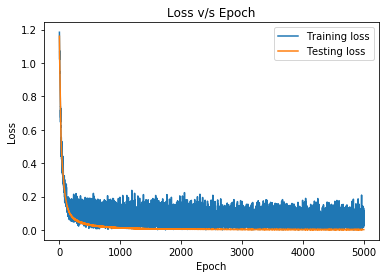

In [36]:
#Plot of training loss and testing loss
graph.plot(epoch_list,training_loss,label='Training loss')
graph.plot(epoch_list,testing_loss,label='Testing loss')
graph.xlabel('Epoch')
graph.ylabel('Loss')
graph.title('Loss v/s Epoch')
graph.legend()
graph.show()

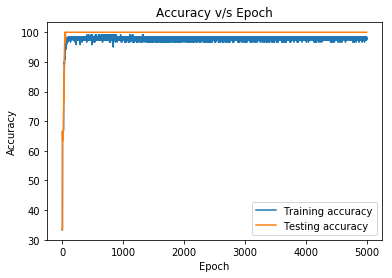

In [37]:
#Plot of training accuracy and testing accuarcy
graph.plot(epoch_list,training_accuracy,label='Training accuracy')
graph.plot(epoch_list,testing_accuracy,label='Testing accuracy')
graph.xlabel('Epoch')
graph.ylabel('Accuracy')
graph.title('Accuracy v/s Epoch')
graph.legend()
graph.show()

In [25]:
#Saving the model state for future use
torch.save(model.state_dict(),"./Iris.pth")

In [27]:
#Reusing the saved model
model=IrisNet(4,100,40,3)
model.load_state_dict(torch.load("./Iris.pth"))
model.eval()

IrisNet(
  (first_layer): Linear(in_features=4, out_features=100, bias=True)
  (first_layer_activation): ReLU()
  (second_layer): Linear(in_features=100, out_features=40, bias=True)
  (second_layer_activation): ReLU()
  (third_layer): Linear(in_features=40, out_features=3, bias=True)
  (third_layer_activation): Sigmoid()
)

In [39]:
#Testing the model for sample data point
test_sample=[[5.8,2.7,5.1,1.9]]
#Expected class for above test sample is 2
output=model(Variable(torch.Tensor(test_sample)))
_,predicted_class=torch.max(output.data,1)
print("The class predicted is:%d"%(predicted_class))

The class predicted is:2
